In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
x = pd.read_csv('creditcard.csv')
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Exploratory Data Analysis

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.

In [4]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Here, the column called 'Class' is our dependent variable and will tell us if the transactions are fraudulent or not.<br>
Class 0 - Transaction occurred is NON-FRAUDULENT.<br>
Class 1 - Transaction occurred is FRAUDULENT.

In [5]:
x.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

In [6]:
x['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

##### As we can see that our data is highly unbalanced. Therefore, this feature needs to be treated carefully for our model to work correctly. The transactions were found to be fraudulent only 0.0017% of the times.

## Data Transformation

In [7]:
x.drop('Time', axis = 1, inplace = True)

The 'time' feature in our data stores the time at which the transaction was occurred. Since, time feature has almost no impact on our class variable, we will remove it from the analysis.

In [8]:
fraud = x[x.Class == 0]
non_fraud = x[x.Class == 1]
print('For Fraudulent Cases:\n',fraud['Amount'].describe())
print('For Not-Fraudulent Cases:\n',non_fraud['Amount'].describe())

For Fraudulent Cases:
 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
For Not-Fraudulent Cases:
 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


As, we can see from the fugures the difference between the minimum and maximum value in out dataset is quite high. So to reduce that high difference, we need to scale our 'Amount' data.

In [9]:
sc = StandardScaler()
x['Amount'] = sc.fit_transform(x['Amount'].values.reshape(-1,1))
print(x['Amount'].head())

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
Name: Amount, dtype: float64


In [10]:
print('AFTER Scaling the Amount column...')

fraud = x[x.Class == 0]
non_fraud = x[x.Class == 1]
print('For Fraudulent Cases:\n',fraud['Amount'].describe())
print('For Not-Fraudulent Cases:\n',non_fraud['Amount'].describe())

AFTER Scaling the Amount column...
For Fraudulent Cases:
 count    284315.000000
mean         -0.000234
std           0.999942
min          -0.353229
25%          -0.330640
50%          -0.265271
75%          -0.045177
max         102.362243
Name: Amount, dtype: float64
For Not-Fraudulent Cases:
 count    492.000000
mean       0.135382
std        1.026242
min       -0.353229
25%       -0.349231
50%       -0.316247
75%        0.070128
max        8.146182
Name: Amount, dtype: float64


Now, the difference is quite low and we can proceed to split our data for training and testing.

## Data Split

In [11]:
X = x.drop('Class', axis = 1).values
Y = x['Class'].values

We will split our data into 2 parts with the 80% data being used for training and the rest 20% for testing.

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size = 0.2)
print(xtrain, xtest, ytrain, ytest)

[[-0.80881852  0.95796949  1.29976471 ... -1.17025012 -0.46959663
   0.01479444]
 [-4.4118628   0.79414298  0.64015646 ... -0.70429786  0.79616166
   0.10655052]
 [ 1.39926271 -1.01895704  0.02634665 ...  0.01795479  0.00444739
  -0.17535454]
 ...
 [-1.52836505  0.03091616 -1.19820363 ... -0.40219989  0.4379317
  -0.27326767]
 [ 2.02006771  0.0813778  -1.61261144 ... -0.06918258 -0.03986921
  -0.34927129]
 [-0.2754114   1.12338425  0.94977484 ...  0.24577705  0.08950088
  -0.34807186]] [[ 2.06055104e+00 -1.26943231e-01 -1.08304498e+00 ... -7.76558409e-02
  -6.20810281e-02 -3.45313182e-01]
 [-3.80436371e-01  1.48885899e+00 -5.04438327e-01 ...  4.73292390e-01
   1.36921153e-01 -3.48471670e-01]
 [ 2.04618103e+00 -1.46262420e+00  1.26423833e-02 ...  3.96119622e-02
  -2.92371454e-02 -7.37631680e-02]
 ...
 [ 1.89086170e-02  8.88682235e-01 -4.05859260e-02 ...  1.75183732e-01
  -1.00897609e-01 -3.43793910e-01]
 [ 2.35988192e+00 -1.15775048e+00 -1.68767038e+00 ... -8.07947547e-03
  -5.31976866e

## Modelling

To select the best model we need to compare the performance of all the models so that we can pick the best one out ofo them. Therefore, the models selected here are: Logistic Regression, Support Vector Machine, K-Nearest Neighbour, Decision Tree and Random Forest.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Logistic Regression

logreg = LogisticRegression().fit(xtrain, ytrain)
lr_res = logreg.predict(xtest)

In [15]:
#SVM

svm = SVC().fit(xtrain, ytrain)
svm_res = svm.predict(xtest)

In [16]:
#KNN

k = KNeighborsClassifier().fit(xtrain, ytrain)
k_res = k.predict(xtest)

In [17]:
#Decision Tree

dt = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
dt.fit(xtrain, ytrain)
dt_res = dt.predict(xtest)

In [18]:
#Random Forest

rf = RandomForestClassifier(max_depth = 4)
rf.fit(xtrain, ytrain)
rf_res = rf.predict(xtest)

## Evaluation

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [41]:
acc = []
f1= []
def accuracy(model):
    acc.append(accuracy_score(ytest, model)*100)
    return accuracy_score(ytest, model)*100

def score(model):
    f1.append(f1_score(ytest, model))
    return f1_score(ytest, model)


In [42]:
print('ACCURACY SCORE FOR THE MODELS:')
print('Logistic Regression:', accuracy(lr_res))
print('SVM:', accuracy(svm_res))
print('KNN:', accuracy(k_res))
print('Decision Tree:', accuracy(dt_res))
print('Random Forest:', accuracy(rf_res))

ACCURACY SCORE FOR THE MODELS:
Logistic Regression: 99.91222218320986
SVM: 99.92451107756047
KNN: 99.95435553526913
Decision Tree: 99.91748885221726
Random Forest: 99.93504441557529


## Analysis

In [43]:
print('F1 - SCORE FOR THE MODELS:')
print('Logistic Regression:', score(lr_res))
print('SVM:', score(svm_res))
print('KNN:', score(k_res))
print('Decision Tree:', score(dt_res))
print('Random Forest:', score(rf_res))

F1 - SCORE FOR THE MODELS:
Logistic Regression: 0.7058823529411764
SVM: 0.7485380116959063
KNN: 0.8602150537634409
Decision Tree: 0.7486631016042781
Random Forest: 0.7955801104972376


#### From the above F1 score and it can be concluded that the best model for the problem is 'K-Nearest Neighbour' with an accuracy of 99.95% and F1 Score of 0.860.

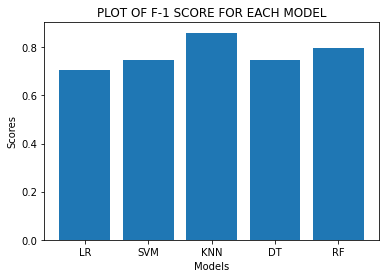

In [47]:
fscore = np.array(f1)
plt.bar(['LR','SVM','KNN','DT','RF'],fscore)
plt.title('PLOT OF F-1 SCORE FOR EACH MODEL')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.show()

### Confusion Matrix

Now, we will go ahead and try to visualize the performance of our models through CONFUSION MATRIX.

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

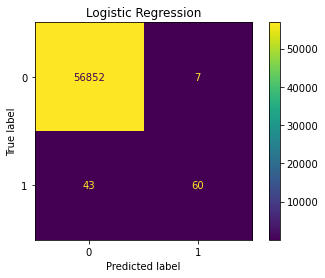

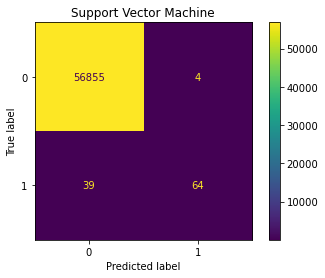

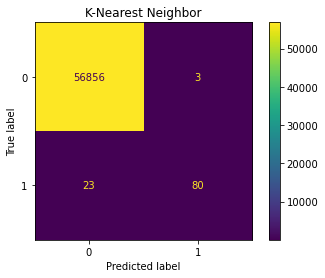

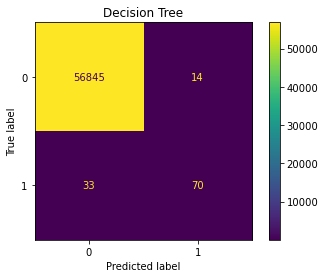

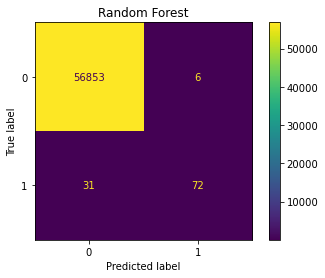

In [24]:
predicts = [lr_res,svm_res,k_res,dt_res,rf_res]

matr = confusion_matrix(ytest, lr_res, labels = [0,1])
disp = ConfusionMatrixDisplay(matr, display_labels = [0,1])
disp.plot()
plt.title('Logistic Regression')
plt.show()

matr = confusion_matrix(ytest, svm_res, labels = [0,1])
disp = ConfusionMatrixDisplay(matr, display_labels = [0,1])
disp.plot()
plt.title('Support Vector Machine')
plt.show()

matr = confusion_matrix(ytest, k_res, labels = [0,1])
disp = ConfusionMatrixDisplay(matr, display_labels = [0,1])
disp.plot()
plt.title('K-Nearest Neighbor')
plt.show()

matr = confusion_matrix(ytest, dt_res, labels = [0,1])
disp = ConfusionMatrixDisplay(matr, display_labels = [0,1])
disp.plot()
plt.title('Decision Tree')
plt.show()

matr = confusion_matrix(ytest, rf_res, labels = [0,1])
disp = ConfusionMatrixDisplay(matr, display_labels = [0,1])
disp.plot()
plt.title('Random Forest')
plt.show()

##### Here, we have plotted Confusion Matrix for each of the model that we was created. the label '0' stands for 'Non-Fraudulent CASES' and '1' represents 'Fradulent Cases'.

#### The Confusion Matrix can easily be used to calculate the Accuracy, Precision and Recall. And collectively they can be used to calculate the 'F-1 Score'.

#### Therefore our best model for this problem is 'K-Nearest Neighbour.'